In [6]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from math import sqrt




In [7]:
dir_origen_csv = "./CSV_generated/"
dir_export = "./Images_generated/"

In [8]:
def DTWDistance(s1, s2):
    DTW={}
    
    for i in range(len(s1)):
        DTW[(i, -1)] = float('inf')
    for i in range(len(s2)):
        DTW[(-1, i)] = float('inf')
    DTW[(-1, -1)] = 0

    for i in range(len(s1)):
        for j in range(len(s2)):
            dist= (s1[i]-s2[j])**2
            DTW[(i, j)] = dist + min(DTW[(i-1, j)],DTW[(i, j-1)], DTW[(i-1, j-1)])
    return sqrt(DTW[len(s1)-1, len(s2)-1])

In [9]:
def DTWDistance(s1, s2,w):
    DTW={}
    
    w = max(w, abs(len(s1)-len(s2)))
    
    for i in range(-1,len(s1)):
        for j in range(-1,len(s2)):
            DTW[(i, j)] = float('inf')
    DTW[(-1, -1)] = 0
  
    for i in range(len(s1)):
        for j in range(max(0, i-w), min(len(s2), i+w)):
            dist= (s1[i]-s2[j])**2
            DTW[(i, j)] = dist + min(DTW[(i-1, j)],DTW[(i, j-1)], DTW[(i-1, j-1)])
    return sqrt(DTW[len(s1)-1, len(s2)-1])

In [10]:
def LB_Keogh(s1,s2,r):
    LB_sum=0
    for ind,i in enumerate(s1):
        
        lower_bound=min(s2[(ind-r if ind-r>=0 else 0):(ind+r)])
        upper_bound=max(s2[(ind-r if ind-r>=0 else 0):(ind+r)])
        
        if i>upper_bound:
            LB_sum=LB_sum+(i-upper_bound)**2
        elif i<lower_bound:
            LB_sum=LB_sum+(i-lower_bound)**2
    
    return sqrt(LB_sum)

In [47]:
df = pd.read_csv(dir_origen_csv + "sera.csv", low_memory = False, sep=",")
df["fecha"] =  pd.to_datetime(df["fecha"]) #transforming "fecha" to datetime
df

,fecha,medidor,lectura_id_orig,voltajeA,voltajeB,voltajeC,corrienteA,corrienteB,corrienteC,modelo,...,Longitud,CLASIFICACION,kwh_consumido,kvarh_consumido,tipo_consumo,clasificacion_encoded,modelo_encoded,tipo_consumo_encoded,kwh_hora,dayMonth
0,2019-04-04 06:28:44,15029835,1142597,131.1979,127.9215,131.9837,0.0263,0.0017,0.0264,A3,...,-79.4733,IGLESIA,0.4500,0.0000,bajo,7,0,0,0.225000,14
1,2019-04-04 08:28:44,15029835,1143023,128.4270,127.4788,129.9663,0.0013,0.0016,0.0112,A3,...,-79.4733,IGLESIA,0.1830,0.0090,bajo,7,0,0,0.091500,14
2,2019-04-04 10:28:44,15029835,1143417,125.9862,125.7077,128.2971,0.0013,0.0016,0.0112,A3,...,-79.4733,IGLESIA,0.0960,0.0000,bajo,7,0,0,0.048000,14
3,2019-04-04 12:28:45,15029835,1143779,126.8655,126.0735,128.6225,0.0013,0.0016,0.0114,A3,...,-79.4733,IGLESIA,0.0960,0.0000,bajo,7,0,0,0.047993,14
4,2019-04-04 14:28:45,15029835,1144165,125.2453,123.8318,127.2888,0.1740,0.0020,0.0110,A3,...,-79.4733,IGLESIA,0.1230,0.0000,bajo,7,0,0,0.061500,14
5,2019-04-04 16:28:45,15029835,1144530,125.9855,125.0129,128.1258,0.0013,0.0017,0.0112,A3,...,-79.4733,IGLESIA,0.2490,0.0000,bajo,7,0,0,0.124500,14
6,2019-04-04 18:28:45,15029835,1144934,123.8179,122.0391,125.7861,0.0013,0.0016,0.0110,A3,...,-79.4733,IGLESIA,0.1440,0.0000,bajo,7,0,0,0.072000,14
7,2019-04-05 06:28:47,15029835,1147537,129.0491,127.8222,130.0290,0.0266,0.0017,0.0263,A3,...,-79.4733,IGLESIA,0.4470,0.0000,bajo,7,0,0,0.223500,14
8,2019-04-05 08:28:47,15029835,1147941,127.9209,127.1520,129.3010,0.0013,0.0016,0.0113,A3,...,-79.4733,IGLESIA,0.1650,0.0120,bajo,7,0,0,0.082500,14
9,2019-04-05 10:28:48,15029835,1148346,126.8511,126.2283,128.2661,0.0013,0.0016,0.0112,A3,...,-79.4733,IGLESIA,0.0930,0.0000,bajo,7,0,0,0.046494,14


In [48]:
max(df.fecha)

Timestamp('2019-06-03 19:56:55')

In [49]:
min(df.fecha)

Timestamp('2019-04-04 06:02:05')

In [50]:
df.set_index("fecha", inplace = True)

In [63]:
Series = []
count = 0
missing_count = 0
for n,g in df.groupby(["medidor", df.index.day, df.index.month]):
    #g.set_index("fecha", inplace = True)

    g = g.resample("h").mean()
    #g.dropna(inplace = True)
    #print(g.isna().sum().sum())
    
    g.fillna(method = "bfill", inplace = True)

    if (len(g) ==13):
        Series.append(g)
        print(str(n) + ":   " + str(min(g.index.hour)) +"--" + str(max(g.index.hour)) +"  Tamaño: " + str(len(g)) + " indice: " + str(count))
    else:
        missing_count += 1
    count +=1

(15029835, 1, 5):   6--18  Tamaño: 13 indice: 0
(15029835, 1, 6):   7--19  Tamaño: 13 indice: 1
(15029835, 2, 5):   6--18  Tamaño: 13 indice: 2
(15029835, 2, 6):   7--19  Tamaño: 13 indice: 3
(15029835, 3, 5):   6--18  Tamaño: 13 indice: 4
(15029835, 3, 6):   7--19  Tamaño: 13 indice: 5
(15029835, 4, 4):   6--18  Tamaño: 13 indice: 6
(15029835, 4, 5):   6--18  Tamaño: 13 indice: 7
(15029835, 5, 5):   6--18  Tamaño: 13 indice: 9
(15029835, 6, 4):   7--19  Tamaño: 13 indice: 10
(15029835, 6, 5):   6--18  Tamaño: 13 indice: 11
(15029835, 7, 4):   7--19  Tamaño: 13 indice: 12
(15029835, 7, 5):   6--18  Tamaño: 13 indice: 13
(15029835, 8, 4):   7--19  Tamaño: 13 indice: 14
(15029835, 8, 5):   6--18  Tamaño: 13 indice: 15
(15029835, 9, 4):   7--19  Tamaño: 13 indice: 16
(15029835, 9, 5):   6--18  Tamaño: 13 indice: 17
(15029835, 10, 4):   7--19  Tamaño: 13 indice: 18
(15029835, 10, 5):   6--18  Tamaño: 13 indice: 19
(15029835, 11, 4):   7--19  Tamaño: 13 indice: 20
(15029835, 12, 4):   7--19

(15029847, 7, 4):   6--18  Tamaño: 13 indice: 195
(15029847, 7, 5):   6--18  Tamaño: 13 indice: 196
(15029847, 8, 4):   6--18  Tamaño: 13 indice: 197
(15029847, 8, 5):   6--18  Tamaño: 13 indice: 198
(15029847, 9, 4):   6--18  Tamaño: 13 indice: 199
(15029847, 10, 4):   6--18  Tamaño: 13 indice: 201
(15029847, 10, 5):   6--18  Tamaño: 13 indice: 202
(15029847, 11, 4):   6--18  Tamaño: 13 indice: 203
(15029847, 11, 5):   6--18  Tamaño: 13 indice: 204
(15029847, 12, 4):   6--18  Tamaño: 13 indice: 205
(15029847, 12, 5):   6--18  Tamaño: 13 indice: 206
(15029847, 13, 5):   6--18  Tamaño: 13 indice: 208
(15029847, 14, 5):   6--18  Tamaño: 13 indice: 210
(15029847, 15, 4):   6--18  Tamaño: 13 indice: 211
(15029847, 15, 5):   6--18  Tamaño: 13 indice: 212
(15029847, 16, 4):   6--18  Tamaño: 13 indice: 213
(15029847, 16, 5):   6--18  Tamaño: 13 indice: 214
(15029847, 17, 4):   6--18  Tamaño: 13 indice: 215
(15029847, 17, 5):   6--18  Tamaño: 13 indice: 216
(15029847, 18, 4):   6--18  Tamaño: 

(15842894, 17, 4):   6--18  Tamaño: 13 indice: 398
(15842894, 17, 5):   6--18  Tamaño: 13 indice: 399
(15842894, 18, 4):   6--18  Tamaño: 13 indice: 400
(15842894, 18, 5):   6--18  Tamaño: 13 indice: 401
(15842894, 19, 4):   6--18  Tamaño: 13 indice: 402
(15842894, 20, 4):   6--18  Tamaño: 13 indice: 404
(15842894, 21, 4):   6--18  Tamaño: 13 indice: 406
(15842894, 21, 5):   6--18  Tamaño: 13 indice: 407
(15842894, 22, 4):   6--18  Tamaño: 13 indice: 408
(15842894, 22, 5):   6--18  Tamaño: 13 indice: 409
(15842894, 23, 4):   6--18  Tamaño: 13 indice: 410
(15842894, 23, 5):   6--18  Tamaño: 13 indice: 411
(15842894, 24, 4):   6--18  Tamaño: 13 indice: 412
(15842894, 24, 5):   6--18  Tamaño: 13 indice: 413
(15842894, 25, 4):   6--18  Tamaño: 13 indice: 414
(15842894, 25, 5):   6--18  Tamaño: 13 indice: 415
(15842894, 26, 4):   6--18  Tamaño: 13 indice: 416
(15842894, 26, 5):   6--18  Tamaño: 13 indice: 417
(15842894, 27, 4):   6--18  Tamaño: 13 indice: 418
(15842894, 27, 5):   6--18  Tam

(16567760, 20, 4):   6--18  Tamaño: 13 indice: 587
(16567760, 21, 4):   6--18  Tamaño: 13 indice: 589
(16567760, 21, 5):   7--19  Tamaño: 13 indice: 590
(16567760, 22, 4):   6--18  Tamaño: 13 indice: 591
(16567760, 22, 5):   7--19  Tamaño: 13 indice: 592
(16567760, 23, 4):   6--18  Tamaño: 13 indice: 593
(16567760, 23, 5):   7--19  Tamaño: 13 indice: 594
(16567760, 24, 4):   6--18  Tamaño: 13 indice: 595
(16567760, 24, 5):   7--19  Tamaño: 13 indice: 596
(16567760, 25, 4):   6--18  Tamaño: 13 indice: 597
(16567760, 26, 4):   6--18  Tamaño: 13 indice: 599
(16567760, 26, 5):   7--19  Tamaño: 13 indice: 600
(16567760, 27, 4):   6--18  Tamaño: 13 indice: 601
(16567760, 27, 5):   7--19  Tamaño: 13 indice: 602
(16567760, 28, 4):   6--18  Tamaño: 13 indice: 603
(16567760, 28, 5):   7--19  Tamaño: 13 indice: 604
(16567760, 29, 4):   6--18  Tamaño: 13 indice: 605
(16567760, 29, 5):   7--19  Tamaño: 13 indice: 606
(16567760, 30, 5):   7--19  Tamaño: 13 indice: 608
(16567760, 31, 5):   7--19  Tam

(16951175, 28, 5):   6--18  Tamaño: 13 indice: 787
(16951175, 29, 4):   7--19  Tamaño: 13 indice: 788
(16951175, 29, 5):   6--18  Tamaño: 13 indice: 789
(16951175, 30, 5):   6--18  Tamaño: 13 indice: 791
(16951175, 31, 5):   6--18  Tamaño: 13 indice: 792
(16951176, 1, 5):   7--19  Tamaño: 13 indice: 793
(16951176, 1, 6):   6--18  Tamaño: 13 indice: 794
(16951176, 2, 5):   7--19  Tamaño: 13 indice: 795
(16951176, 2, 6):   6--18  Tamaño: 13 indice: 796
(16951176, 3, 5):   7--19  Tamaño: 13 indice: 797
(16951176, 4, 4):   6--18  Tamaño: 13 indice: 799
(16951176, 4, 5):   7--19  Tamaño: 13 indice: 800
(16951176, 5, 5):   7--19  Tamaño: 13 indice: 802
(16951176, 6, 4):   7--19  Tamaño: 13 indice: 803
(16951176, 6, 5):   7--19  Tamaño: 13 indice: 804
(16951176, 7, 4):   7--19  Tamaño: 13 indice: 805
(16951176, 7, 5):   7--19  Tamaño: 13 indice: 806
(16951176, 8, 4):   7--19  Tamaño: 13 indice: 807
(16951176, 8, 5):   7--19  Tamaño: 13 indice: 808
(16951176, 9, 4):   7--19  Tamaño: 13 indice:

(16951201, 6, 5):   6--18  Tamaño: 13 indice: 987
(16951201, 7, 4):   6--18  Tamaño: 13 indice: 988
(16951201, 7, 5):   6--18  Tamaño: 13 indice: 989
(16951201, 8, 4):   6--18  Tamaño: 13 indice: 990
(16951201, 8, 5):   6--18  Tamaño: 13 indice: 991
(16951201, 9, 4):   6--18  Tamaño: 13 indice: 992
(16951201, 9, 5):   6--18  Tamaño: 13 indice: 993
(16951201, 10, 4):   6--18  Tamaño: 13 indice: 994
(16951201, 10, 5):   6--18  Tamaño: 13 indice: 995
(16951201, 11, 4):   6--18  Tamaño: 13 indice: 996
(16951201, 11, 5):   6--18  Tamaño: 13 indice: 997
(16951201, 12, 4):   6--18  Tamaño: 13 indice: 998
(16951201, 12, 5):   6--18  Tamaño: 13 indice: 999
(16951201, 13, 4):   6--18  Tamaño: 13 indice: 1000
(16951201, 14, 4):   6--18  Tamaño: 13 indice: 1002
(16951201, 14, 5):   6--18  Tamaño: 13 indice: 1003
(16951201, 15, 4):   6--18  Tamaño: 13 indice: 1004
(16951201, 15, 5):   6--18  Tamaño: 13 indice: 1005
(16951201, 16, 4):   6--18  Tamaño: 13 indice: 1006
(16951201, 16, 5):   6--18  Tama

(16951207, 14, 4):   6--18  Tamaño: 13 indice: 1185
(16951207, 14, 5):   6--18  Tamaño: 13 indice: 1186
(16951207, 15, 4):   6--18  Tamaño: 13 indice: 1187
(16951207, 15, 5):   6--18  Tamaño: 13 indice: 1188
(16951207, 16, 4):   6--18  Tamaño: 13 indice: 1189
(16951207, 16, 5):   6--18  Tamaño: 13 indice: 1190
(16951207, 17, 4):   6--18  Tamaño: 13 indice: 1191
(16951207, 17, 5):   6--18  Tamaño: 13 indice: 1192
(16951207, 18, 4):   6--18  Tamaño: 13 indice: 1193
(16951207, 18, 5):   6--18  Tamaño: 13 indice: 1194
(16951207, 19, 4):   6--18  Tamaño: 13 indice: 1195
(16951207, 20, 4):   6--18  Tamaño: 13 indice: 1197
(16951207, 21, 4):   6--18  Tamaño: 13 indice: 1199
(16951207, 22, 4):   6--18  Tamaño: 13 indice: 1201
(16951207, 22, 5):   6--18  Tamaño: 13 indice: 1202
(16951207, 23, 4):   6--18  Tamaño: 13 indice: 1203
(16951207, 24, 4):   6--18  Tamaño: 13 indice: 1205
(16951207, 25, 4):   6--18  Tamaño: 13 indice: 1207
(16951207, 25, 5):   6--18  Tamaño: 13 indice: 1208
(16951207, 2

(16951216, 23, 5):   6--18  Tamaño: 13 indice: 1387
(16951216, 24, 5):   6--18  Tamaño: 13 indice: 1389
(16951216, 25, 4):   6--18  Tamaño: 13 indice: 1390
(16951216, 25, 5):   6--18  Tamaño: 13 indice: 1391
(16951216, 26, 4):   6--18  Tamaño: 13 indice: 1392
(16951216, 26, 5):   6--18  Tamaño: 13 indice: 1393
(16951216, 27, 4):   6--18  Tamaño: 13 indice: 1394
(16951216, 27, 5):   6--18  Tamaño: 13 indice: 1395
(16951216, 28, 4):   6--18  Tamaño: 13 indice: 1396
(16951216, 28, 5):   6--18  Tamaño: 13 indice: 1397
(16951216, 29, 4):   6--18  Tamaño: 13 indice: 1398
(16951216, 29, 5):   6--18  Tamaño: 13 indice: 1399
(16951216, 30, 5):   6--18  Tamaño: 13 indice: 1401
(16951216, 31, 5):   6--18  Tamaño: 13 indice: 1402
(16951219, 1, 5):   6--18  Tamaño: 13 indice: 1403
(16951219, 1, 6):   6--18  Tamaño: 13 indice: 1404
(16951219, 2, 5):   6--18  Tamaño: 13 indice: 1405
(16951219, 2, 6):   6--18  Tamaño: 13 indice: 1406
(16951219, 3, 5):   6--18  Tamaño: 13 indice: 1407
(16951219, 4, 4):

(16951221, 25, 4):   6--18  Tamaño: 13 indice: 1573
(16951221, 25, 5):   6--18  Tamaño: 13 indice: 1574
(16951221, 26, 4):   6--18  Tamaño: 13 indice: 1575
(16951221, 26, 5):   6--18  Tamaño: 13 indice: 1576
(16951221, 27, 4):   6--18  Tamaño: 13 indice: 1577
(16951221, 27, 5):   6--18  Tamaño: 13 indice: 1578
(16951221, 28, 4):   6--18  Tamaño: 13 indice: 1579
(16951221, 28, 5):   6--18  Tamaño: 13 indice: 1580
(16951221, 29, 4):   6--18  Tamaño: 13 indice: 1581
(16951221, 29, 5):   6--18  Tamaño: 13 indice: 1582
(16951221, 30, 4):   6--18  Tamaño: 13 indice: 1583
(16951221, 30, 5):   6--18  Tamaño: 13 indice: 1584
(16951221, 31, 5):   6--18  Tamaño: 13 indice: 1585
(16951222, 1, 5):   6--18  Tamaño: 13 indice: 1586
(16951222, 1, 6):   6--18  Tamaño: 13 indice: 1587
(16951222, 2, 5):   6--18  Tamaño: 13 indice: 1588
(16951222, 2, 6):   6--18  Tamaño: 13 indice: 1589
(16951222, 3, 5):   6--18  Tamaño: 13 indice: 1590
(16951222, 4, 4):   7--19  Tamaño: 13 indice: 1592
(16951222, 4, 5): 

(35924864, 15, 4):   6--18  Tamaño: 13 indice: 1858
(35924864, 16, 4):   6--18  Tamaño: 13 indice: 1860
(35924864, 17, 4):   6--18  Tamaño: 13 indice: 1862
(35924864, 18, 4):   6--18  Tamaño: 13 indice: 1864
(35924864, 19, 4):   6--18  Tamaño: 13 indice: 1866
(35924864, 20, 4):   6--18  Tamaño: 13 indice: 1868
(35924864, 20, 5):   6--18  Tamaño: 13 indice: 1869
(35924864, 21, 4):   6--18  Tamaño: 13 indice: 1870
(35924864, 21, 5):   6--18  Tamaño: 13 indice: 1871
(35924864, 22, 4):   6--18  Tamaño: 13 indice: 1872
(35924864, 22, 5):   6--18  Tamaño: 13 indice: 1873
(35924864, 23, 4):   6--18  Tamaño: 13 indice: 1874
(35924864, 23, 5):   6--18  Tamaño: 13 indice: 1875
(35924864, 24, 5):   6--18  Tamaño: 13 indice: 1877
(35924864, 25, 5):   6--18  Tamaño: 13 indice: 1879
(35924864, 26, 5):   6--18  Tamaño: 13 indice: 1881
(35924864, 27, 4):   6--18  Tamaño: 13 indice: 1882
(35924864, 27, 5):   6--18  Tamaño: 13 indice: 1883
(35924864, 28, 5):   6--18  Tamaño: 13 indice: 1885
(35924864, 2

(35925308, 7, 4):   6--18  Tamaño: 13 indice: 2208
(35925308, 7, 5):   6--18  Tamaño: 13 indice: 2209
(35925308, 8, 4):   6--18  Tamaño: 13 indice: 2210
(35925308, 9, 4):   6--18  Tamaño: 13 indice: 2212
(35925308, 9, 5):   7--19  Tamaño: 13 indice: 2213
(35925308, 10, 4):   6--18  Tamaño: 13 indice: 2214
(35925308, 10, 5):   7--19  Tamaño: 13 indice: 2215
(35925308, 11, 4):   6--18  Tamaño: 13 indice: 2216
(35925308, 11, 5):   7--19  Tamaño: 13 indice: 2217
(35925308, 12, 4):   6--18  Tamaño: 13 indice: 2218
(35925308, 12, 5):   7--19  Tamaño: 13 indice: 2219
(35925308, 13, 4):   6--18  Tamaño: 13 indice: 2220
(35925308, 13, 5):   7--19  Tamaño: 13 indice: 2221
(35925308, 14, 4):   6--18  Tamaño: 13 indice: 2222
(35925308, 14, 5):   7--19  Tamaño: 13 indice: 2223
(35925308, 15, 4):   6--18  Tamaño: 13 indice: 2224
(35925308, 15, 5):   7--19  Tamaño: 13 indice: 2225
(35925308, 16, 4):   6--18  Tamaño: 13 indice: 2226
(35925308, 17, 4):   6--18  Tamaño: 13 indice: 2228
(35925308, 18, 4)

(41175730, 27, 4):   6--18  Tamaño: 13 indice: 2492
(41175730, 28, 4):   6--18  Tamaño: 13 indice: 2494
(41175730, 29, 4):   6--18  Tamaño: 13 indice: 2496
(41175730, 30, 4):   6--18  Tamaño: 13 indice: 2498
(52071447, 1, 5):   6--18  Tamaño: 13 indice: 2501
(52071447, 2, 5):   6--18  Tamaño: 13 indice: 2503
(52071447, 3, 5):   6--18  Tamaño: 13 indice: 2505
(52071447, 4, 4):   6--18  Tamaño: 13 indice: 2507
(52071447, 4, 5):   6--18  Tamaño: 13 indice: 2508
(52071447, 5, 4):   6--18  Tamaño: 13 indice: 2509
(52071447, 5, 5):   6--18  Tamaño: 13 indice: 2510
(52071447, 6, 4):   6--18  Tamaño: 13 indice: 2511
(52071447, 6, 5):   6--18  Tamaño: 13 indice: 2512
(52071447, 7, 4):   6--18  Tamaño: 13 indice: 2513
(52071447, 7, 5):   6--18  Tamaño: 13 indice: 2514
(52071447, 8, 4):   6--18  Tamaño: 13 indice: 2515
(52071447, 8, 5):   6--18  Tamaño: 13 indice: 2516
(52071447, 9, 4):   6--18  Tamaño: 13 indice: 2517
(52071447, 10, 4):   6--18  Tamaño: 13 indice: 2519
(52071447, 11, 4):   6--18

(52073295, 15, 5):   6--18  Tamaño: 13 indice: 3017
(52073295, 16, 5):   6--18  Tamaño: 13 indice: 3019
(52073295, 17, 5):   6--18  Tamaño: 13 indice: 3021
(52073295, 18, 5):   6--18  Tamaño: 13 indice: 3023
(52073295, 21, 5):   6--18  Tamaño: 13 indice: 3029
(52073295, 22, 5):   6--18  Tamaño: 13 indice: 3031
(52073295, 23, 4):   7--19  Tamaño: 13 indice: 3032
(52073295, 23, 5):   6--18  Tamaño: 13 indice: 3033
(52073295, 24, 4):   7--19  Tamaño: 13 indice: 3034
(52073295, 25, 4):   7--19  Tamaño: 13 indice: 3036
(52073295, 27, 4):   6--18  Tamaño: 13 indice: 3040
(52073295, 27, 5):   6--18  Tamaño: 13 indice: 3041
(52073295, 28, 4):   6--18  Tamaño: 13 indice: 3042
(52073295, 29, 4):   6--18  Tamaño: 13 indice: 3044
(52073295, 29, 5):   6--18  Tamaño: 13 indice: 3045
(52073295, 30, 4):   6--18  Tamaño: 13 indice: 3046
(52073302, 1, 5):   6--18  Tamaño: 13 indice: 3049
(52073302, 2, 5):   6--18  Tamaño: 13 indice: 3051
(52073302, 3, 5):   6--18  Tamaño: 13 indice: 3053
(52073302, 4, 5

(52073352, 15, 4):   6--18  Tamaño: 13 indice: 3321
(52073352, 16, 4):   6--18  Tamaño: 13 indice: 3323
(52073352, 17, 4):   6--18  Tamaño: 13 indice: 3325
(52073352, 18, 4):   6--18  Tamaño: 13 indice: 3327
(52073352, 19, 4):   6--18  Tamaño: 13 indice: 3329
(52073352, 20, 4):   6--18  Tamaño: 13 indice: 3331
(52073352, 20, 5):   6--18  Tamaño: 13 indice: 3332
(52073352, 21, 4):   6--18  Tamaño: 13 indice: 3333
(52073352, 21, 5):   6--18  Tamaño: 13 indice: 3334
(52073352, 22, 4):   6--18  Tamaño: 13 indice: 3335
(52073352, 23, 4):   6--18  Tamaño: 13 indice: 3337
(52073352, 24, 4):   6--18  Tamaño: 13 indice: 3339
(52073352, 25, 4):   6--18  Tamaño: 13 indice: 3341
(52073359, 1, 6):   7--19  Tamaño: 13 indice: 3355
(52073359, 2, 6):   7--19  Tamaño: 13 indice: 3357
(52073359, 3, 6):   7--19  Tamaño: 13 indice: 3359
(52073359, 6, 4):   6--18  Tamaño: 13 indice: 3364
(52073359, 7, 4):   6--18  Tamaño: 13 indice: 3366
(52073359, 8, 4):   6--18  Tamaño: 13 indice: 3368
(52073359, 9, 4): 

(58706632, 10, 5):   7--19  Tamaño: 13 indice: 3739
(58706632, 11, 5):   7--19  Tamaño: 13 indice: 3741
(58706632, 12, 5):   7--19  Tamaño: 13 indice: 3743
(58706632, 13, 5):   7--19  Tamaño: 13 indice: 3745
(58706632, 14, 5):   7--19  Tamaño: 13 indice: 3747
(58706632, 15, 5):   7--19  Tamaño: 13 indice: 3749
(58706632, 16, 5):   7--19  Tamaño: 13 indice: 3751
(58706632, 17, 5):   7--19  Tamaño: 13 indice: 3753
(58706632, 18, 5):   7--19  Tamaño: 13 indice: 3755
(58706632, 22, 4):   7--19  Tamaño: 13 indice: 3762
(58706632, 23, 4):   7--19  Tamaño: 13 indice: 3764
(58706632, 23, 5):   7--19  Tamaño: 13 indice: 3765
(58706632, 24, 4):   7--19  Tamaño: 13 indice: 3766
(58706632, 24, 5):   7--19  Tamaño: 13 indice: 3767
(58706632, 25, 4):   7--19  Tamaño: 13 indice: 3768
(58706632, 25, 5):   7--19  Tamaño: 13 indice: 3769
(58706632, 26, 5):   7--19  Tamaño: 13 indice: 3771
(58706632, 27, 5):   7--19  Tamaño: 13 indice: 3773
(58706632, 28, 5):   7--19  Tamaño: 13 indice: 3775
(58706632, 2

(58706663, 2, 5):   6--18  Tamaño: 13 indice: 4026
(58706663, 3, 5):   6--18  Tamaño: 13 indice: 4028
(58706663, 4, 5):   6--18  Tamaño: 13 indice: 4031
(58706663, 5, 5):   6--18  Tamaño: 13 indice: 4033
(58706663, 6, 5):   6--18  Tamaño: 13 indice: 4035
(58706663, 7, 5):   6--18  Tamaño: 13 indice: 4037
(58706663, 8, 4):   7--19  Tamaño: 13 indice: 4038
(58706663, 9, 4):   7--19  Tamaño: 13 indice: 4040
(58706663, 10, 4):   7--19  Tamaño: 13 indice: 4042
(58706663, 10, 5):   6--18  Tamaño: 13 indice: 4043
(58706663, 11, 4):   6--18  Tamaño: 13 indice: 4044
(58706663, 11, 5):   6--18  Tamaño: 13 indice: 4045
(58706663, 12, 4):   6--18  Tamaño: 13 indice: 4046
(58706663, 12, 5):   6--18  Tamaño: 13 indice: 4047
(58706663, 13, 4):   6--18  Tamaño: 13 indice: 4048
(58706663, 13, 5):   6--18  Tamaño: 13 indice: 4049
(58706663, 14, 5):   6--18  Tamaño: 13 indice: 4051
(58706663, 15, 5):   6--18  Tamaño: 13 indice: 4053
(58706663, 16, 5):   6--18  Tamaño: 13 indice: 4055
(58706663, 17, 5):  

(58706740, 21, 5):   6--18  Tamaño: 13 indice: 4309
(58706740, 23, 5):   7--19  Tamaño: 13 indice: 4313
(58706740, 24, 5):   7--19  Tamaño: 13 indice: 4315
(58706740, 25, 5):   7--19  Tamaño: 13 indice: 4317
(58706740, 26, 5):   7--19  Tamaño: 13 indice: 4319
(58706740, 27, 4):   6--18  Tamaño: 13 indice: 4320
(58706740, 27, 5):   7--19  Tamaño: 13 indice: 4321
(58706740, 28, 5):   7--19  Tamaño: 13 indice: 4323
(58706740, 29, 5):   7--19  Tamaño: 13 indice: 4325
(58706740, 30, 5):   7--19  Tamaño: 13 indice: 4327
(58706740, 31, 5):   7--19  Tamaño: 13 indice: 4328
(59814806, 1, 5):   6--18  Tamaño: 13 indice: 4329
(59814806, 2, 5):   6--18  Tamaño: 13 indice: 4331
(59814806, 10, 5):   7--19  Tamaño: 13 indice: 4348
(59814806, 11, 5):   7--19  Tamaño: 13 indice: 4350
(59814806, 12, 5):   7--19  Tamaño: 13 indice: 4352
(59814806, 13, 5):   7--19  Tamaño: 13 indice: 4354
(59814806, 14, 5):   7--19  Tamaño: 13 indice: 4356
(59814806, 15, 5):   7--19  Tamaño: 13 indice: 4358
(59814806, 16,

In [64]:

time_series = [i.reset_index()["kwh_consumido"] for i in Series]

In [65]:
'''
for i in range(len(time_series)):
    s = time_series[i]
    s = (s - s.min()) / (s.max() - s.min())
    time_series[i] = s
'''

'\nfor i in range(len(time_series)):\n    s = time_series[i]\n    s = (s - s.min()) / (s.max() - s.min())\n    time_series[i] = s\n'

In [66]:
time_series[2]

0     2.982
1     2.766
2     2.766
3     2.736
4     2.736
5     5.910
6     5.910
7     5.910
8     5.910
9     2.985
10    2.985
11    2.958
12    2.958
Name: kwh_consumido, dtype: float64

In [67]:
missing_count

1655

In [68]:
import random

def k_means_clust(data,num_clust,num_iter,w=5):
    centroids=random.sample(list(data),num_clust)
    print("Centroids")
    print(centroids)
    counter=0
    for n in range(num_iter):
        counter+=1
        print( counter)
        assignments={}
        #assign data points to clusters
        
        for ind,i in enumerate(data):
            min_dist=float('inf')
            closest_clust=None
            for c_ind,j in enumerate(centroids):
                #print("Iteracion#: {}, data {}, centroid: {}".format(n,ind,c_ind))
                if LB_Keogh(i,j,w)<min_dist:
                    cur_dist=DTWDistance(i,j,w)
                    if cur_dist<min_dist:
                        min_dist=cur_dist
                        closest_clust=c_ind
            if closest_clust in assignments:
                assignments[closest_clust].append(ind)
            else:
                assignments[closest_clust]=[]
    
        #recalculate centroids of clusters
        print("recalculate centroids of clusters")
        for key in assignments:
            clust_sum=0
            for k in assignments[key]:
                clust_sum=clust_sum+data[k]
            centroids[key]=[m/len(assignments[key]) for m in clust_sum]
    
    return centroids, assignments

Centroids
[0     23.7901
1     43.7634
2     43.7634
3     43.7634
4     43.7634
5     84.3474
6     84.3474
7     84.3474
8     84.3474
9     84.3474
10    84.3474
11    84.3474
12    84.3474
Name: kwh_consumido, dtype: float64, 0     244.8131
1     272.5584
2     272.5584
3     272.5584
4     272.5584
5     224.9993
6     224.9993
7     224.9993
8     224.9993
9     272.8395
10    272.8395
11    272.8395
12    272.8395
Name: kwh_consumido, dtype: float64, 0      0.0336
1     35.9704
2     35.9704
3     35.9704
4     35.9704
5     71.9407
6     71.9407
7     71.9407
8     71.9407
9     74.0714
10    74.0714
11    74.0714
12    74.0714
Name: kwh_consumido, dtype: float64, 0      1.8874
1     24.5954
2     24.5954
3     24.5954
4     24.5954
5     33.2525
6     33.2525
7     33.2525
8     33.2525
9     29.1588
10    29.1588
11    29.1588
12    29.1588
Name: kwh_consumido, dtype: float64]
1
recalculate centroids of clusters
2
recalculate centroids of clusters
3
recalculate centroids of c

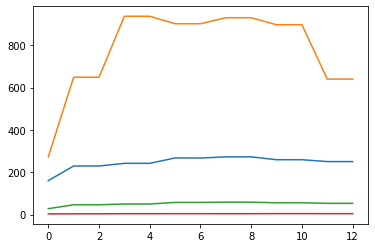

In [69]:
centroids2, los_demas = k_means_clust(time_series,4,5,2)
for i in centroids2:
    
    plt.plot(i)

plt.show()

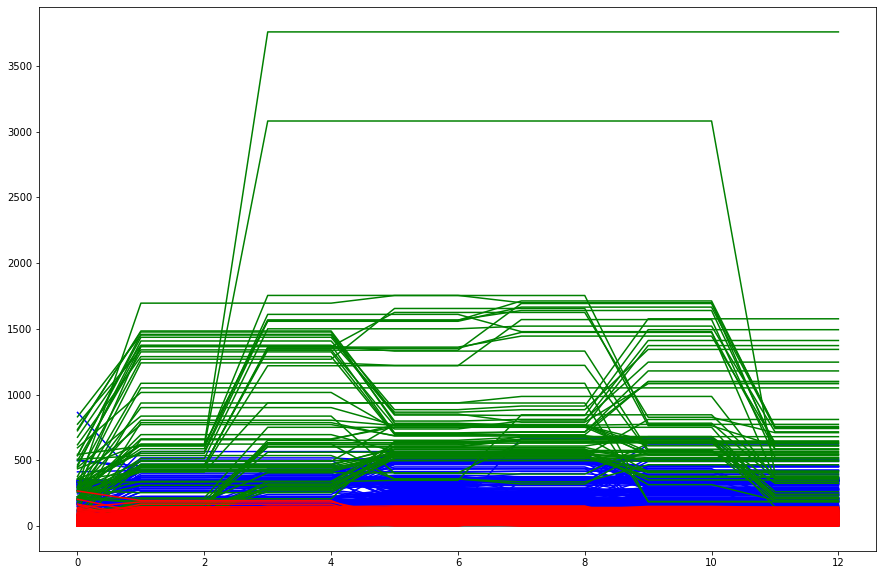

In [70]:
fig = plt.figure(figsize = (15,10))

for key in (los_demas):
    indexes = los_demas[key]
    if(key == 0):
        c = "b"
    elif(key == 1):
        c = "g"
    elif(key == 2):
        c = "r"
    elif(key == 3):
        c = "c"
    else:
        c = "m"
    for i in indexes:
        serie = time_series[i]
        #serie = (serie - serie.min() )/(serie.max() - serie.min())
        plt.plot(serie, c = c)
    